In [1]:
import os
import re

# 파일 불러오기

In [2]:
main_path = 'D:\\kaggle\\version2\\투빅스 오디오\\audio_word'
classnames=os.listdir(main_path)
train_count_dict = {}
for d in classnames:
    people = os.listdir(os.path.join(main_path, d))
    temp = []
    length = len(people)
    temp.append(length)

    train_count_dict[d] = sum(temp)
train_count_dict    

{'계단': 80, '과제': 80, '구름': 80}

# Spectrogram 추출

1. 단어 구분을 위해 save_path에 스펙트로그램을 저장함
2. save_path는 이미지만 저장됨

In [3]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [5]:
train_image_path = "D:\\kaggle\\version2\\투빅스 오디오\\train_image_일반"
val_image_path  = "D:\\kaggle\\version2\\투빅스 오디오\\val_image_일반"

os.mkdir(train_image_path)
os.mkdir(val_image_path)
for m in classnames:
    target = os.path.join(train_image_path,m)
    os.mkdir(target)
    
    target = os.path.join(val_image_path,m)
    os.mkdir(target) 

In [6]:
# 화자별로 따로 나눌 new_train, val_train폴더 및 클래스 폴더 생성
new_train_path = "D:\\kaggle\\version2\\투빅스 오디오\\train_audio"
val_train_path  = "D:\\kaggle\\version2\\투빅스 오디오\\val_audio"

In [7]:
for name in classnames:
    print(name)
    path = os.path.join(new_train_path,name)
    audio_list = os.listdir(path)
    
    for audio in audio_list:
        audio_dir = os.path.join(path,audio)
        y, sr = librosa.load(audio_dir)
        save_dir = os.path.join(train_image_path,name,audio.split(".")[0]+".png")
        
        D = librosa.stft(y)
        librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max))
        plt.savefig(train_image_path +'\\'+name +'\\' + audio.split(".")[0]+".png", bbox_inches='tight', pad_inches=0)
        plt.close('all') # 너무 많이 쌓이면 에러가 난다.

계단
과제
구름


In [8]:
for name in classnames:
    print(name)
    path = os.path.join(val_train_path,name)
    audio_list = os.listdir(path)
    
    for audio in audio_list:
        audio_dir = os.path.join(path,audio)
        y, sr = librosa.load(audio_dir)
        save_dir = os.path.join(train_image_path,name,audio.split(".")[0]+".png")
        
        D = librosa.stft(y)
        librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max))
        plt.savefig(val_image_path +'\\'+name +'\\' + audio.split(".")[0]+".png", bbox_inches='tight', pad_inches=0)
        plt.close('all') # 너무 많이 쌓이면 에러가 난다.

계단
과제
구름


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Using TensorFlow backend.


In [2]:
raw_path = "D:\\kaggle\\version2\\투빅스 오디오"
train_image_path = "D:\\kaggle\\version2\\투빅스 오디오\\train_image_일반"
val_image_path  = "D:\\kaggle\\version2\\투빅스 오디오\\val_image_일반"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_image_path,
        target_size=(286, 278),
        #batch_size=64,
        class_mode='categorical')

Found 180 images belonging to 3 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_image_path,
        target_size=(286, 278),    
        batch_size=60,
        class_mode='categorical',
shuffle=False)

Found 60 images belonging to 3 classes.


In [5]:
model1 = Sequential()

model1.add(Conv2D(8, kernel_size=(3, 3), activation='elu',input_shape=(286,278,3),kernel_initializer= 'glorot_normal' ))

model1.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1,activation='elu',kernel_initializer= 'glorot_normal'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Conv2D(32, (3, 3), activation='elu', strides=1,kernel_initializer= 'glorot_normal'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Conv2D(64, (3, 3), activation='elu', strides=1,kernel_initializer= 'glorot_normal'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Flatten())
model1.add(Dense(128, activation='elu',kernel_initializer= 'glorot_normal'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='elu',kernel_initializer= 'glorot_normal'))

model1.add(Dense(len(train_generator.class_indices) , activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 284, 276, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 282, 274, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 91, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 89, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 29, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
__________

In [6]:
model2 = Sequential()
model2.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(286,278,3),kernel_initializer= 'glorot_normal'))

model2.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=1,activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu',kernel_initializer= 'glorot_normal'))

model2.add(Dense(len(train_generator.class_indices), activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 282, 274, 8)       608       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 278, 270, 16)      3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 92, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 88, 86, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [7]:
model3 = Sequential()
model3.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(286,278,3),kernel_initializer= 'glorot_normal'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=1,activation='relu',kernel_initializer= 'glorot_normal'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))


model3.add(Flatten())
model3.add(Dense(128, activation='relu',kernel_initializer= 'glorot_normal'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu',kernel_initializer= 'glorot_normal'))

model3.add(Dense(len(train_generator.class_indices), activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 282, 274, 8)       608       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 94, 91, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 87, 16)        3216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 29, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 25, 32)        12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          51264     
__________

In [8]:
model4 = Sequential()
model4.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(286,278,3),kernel_initializer= 'glorot_normal'))

model4.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=1,activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(MaxPooling2D(pool_size=(3, 3)))

model4.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(MaxPooling2D(pool_size=(3, 3)))

model4.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(MaxPooling2D(pool_size=(3, 3)))

model4.add(Conv2D(128, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))


model4.add(Flatten())
model4.add(Dense(128, activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu',kernel_initializer= 'glorot_normal'))

model4.add(Dense(len(train_generator.class_indices), activation='softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 282, 274, 8)       608       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 278, 270, 16)      3216      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 92, 90, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 88, 86, 32)        12832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 29, 28, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
__________

In [9]:
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

In [10]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
hist = model1.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 12s 1s/step - loss: 1.1102 - acc: 0.2922 - val_loss: 1.0932 - val_acc: 0.3333
Epoch 2/80
10/10 [==============================] - 9s 940ms/step - loss: 1.0495 - acc: 0.4477 - val_loss: 1.0884 - val_acc: 0.3333
Epoch 3/80
10/10 [==============================] - 9s 893ms/step - loss: 0.9692 - acc: 0.5584 - val_loss: 1.0983 - val_acc: 0.3333
Epoch 4/80
10/10 [==============================] - 9s 921ms/step - loss: 0.8935 - acc: 0.5687 - val_loss: 1.1132 - val_acc: 0.3333
Epoch 5/80
10/10 [==============================] - 9s 911ms/step - loss: 0.8544 - acc: 0.5574 - val_loss: 1.2593 - val_acc: 0.3333
Epoch 6/80
10/10 [==============================] - 9s 855ms/step - loss: 0.7688 - acc: 0.6479 - val_loss: 1.3593 - val_acc: 0.3333
Epoch 7/80
10/10 [==============================] - 9s 875ms/step - loss: 0.7418 - acc: 0.6616 - val_loss: 1.3169 - val_acc: 0.3333
Epoch 8/80
10/10 [==============================] - 10s 954ms/step - loss: 0.6

Epoch 63/80
10/10 [==============================] - 9s 882ms/step - loss: 0.0122 - acc: 1.0000 - val_loss: 3.6346 - val_acc: 0.5333
Epoch 64/80
10/10 [==============================] - 9s 897ms/step - loss: 0.0276 - acc: 0.9906 - val_loss: 3.5394 - val_acc: 0.5667
Epoch 65/80
10/10 [==============================] - 9s 893ms/step - loss: 0.0113 - acc: 1.0000 - val_loss: 3.7814 - val_acc: 0.5667
Epoch 66/80
10/10 [==============================] - 8s 759ms/step - loss: 0.0206 - acc: 0.9969 - val_loss: 3.7162 - val_acc: 0.5667
Epoch 67/80
10/10 [==============================] - 9s 868ms/step - loss: 0.0108 - acc: 1.0000 - val_loss: 3.7596 - val_acc: 0.5667
Epoch 68/80
10/10 [==============================] - 8s 826ms/step - loss: 0.0074 - acc: 1.0000 - val_loss: 3.7545 - val_acc: 0.5667
Epoch 69/80
10/10 [==============================] - 9s 862ms/step - loss: 0.0086 - acc: 1.0000 - val_loss: 3.7922 - val_acc: 0.5667
Epoch 70/80
10/10 [==============================] - 8s 785ms/step - 

In [12]:
hist2 = model2.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 10s 1s/step - loss: 1.0935 - acc: 0.3395 - val_loss: 1.0988 - val_acc: 0.3333
Epoch 2/80
10/10 [==============================] - 9s 922ms/step - loss: 1.0871 - acc: 0.3576 - val_loss: 1.0974 - val_acc: 0.3333
Epoch 3/80
10/10 [==============================] - 9s 872ms/step - loss: 1.0747 - acc: 0.3973 - val_loss: 1.0959 - val_acc: 0.3333
Epoch 4/80
10/10 [==============================] - 9s 872ms/step - loss: 1.0538 - acc: 0.4031 - val_loss: 1.0923 - val_acc: 0.3333
Epoch 5/80
10/10 [==============================] - 9s 919ms/step - loss: 1.0364 - acc: 0.3999 - val_loss: 1.0814 - val_acc: 0.3333
Epoch 6/80
10/10 [==============================] - 9s 887ms/step - loss: 0.9712 - acc: 0.4983 - val_loss: 1.0678 - val_acc: 0.3333
Epoch 7/80
10/10 [==============================] - 9s 904ms/step - loss: 0.9030 - acc: 0.5260 - val_loss: 1.0664 - val_acc: 0.3500
Epoch 8/80
10/10 [==============================] - 9s 898ms/step - loss: 0.91

10/10 [==============================] - 9s 905ms/step - loss: 0.0117 - acc: 1.0000 - val_loss: 5.1954 - val_acc: 0.4167
Epoch 63/80
10/10 [==============================] - 8s 826ms/step - loss: 0.0829 - acc: 0.9717 - val_loss: 3.4358 - val_acc: 0.4667
Epoch 64/80
10/10 [==============================] - 9s 917ms/step - loss: 0.0174 - acc: 1.0000 - val_loss: 4.2736 - val_acc: 0.4167
Epoch 65/80
10/10 [==============================] - 9s 878ms/step - loss: 0.0378 - acc: 0.9906 - val_loss: 2.9682 - val_acc: 0.4667
Epoch 66/80
10/10 [==============================] - 8s 844ms/step - loss: 0.0168 - acc: 0.9969 - val_loss: 4.0553 - val_acc: 0.4333
Epoch 67/80
10/10 [==============================] - 9s 896ms/step - loss: 0.0387 - acc: 0.9843 - val_loss: 5.0072 - val_acc: 0.4167
Epoch 68/80
10/10 [==============================] - 9s 861ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 5.5339 - val_acc: 0.4000
Epoch 69/80
10/10 [==============================] - 8s 820ms/step - loss: 0.0171

In [13]:
hist3 = model3.fit_generator(
        train_generator,
        steps_per_epoch=10, #20개 이미지를 300번 학습시키는 것이 1 epoch로 정의.
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 8s 834ms/step - loss: 1.0978 - acc: 0.3660 - val_loss: 1.0975 - val_acc: 0.3333
Epoch 2/80
10/10 [==============================] - 8s 824ms/step - loss: 1.0963 - acc: 0.4296 - val_loss: 1.0970 - val_acc: 0.4000
Epoch 3/80
10/10 [==============================] - 8s 824ms/step - loss: 1.0949 - acc: 0.3893 - val_loss: 1.0966 - val_acc: 0.3833
Epoch 4/80
10/10 [==============================] - 8s 771ms/step - loss: 1.0949 - acc: 0.4199 - val_loss: 1.0964 - val_acc: 0.3667
Epoch 5/80
10/10 [==============================] - 8s 813ms/step - loss: 1.0937 - acc: 0.4246 - val_loss: 1.0960 - val_acc: 0.3333
Epoch 6/80
10/10 [==============================] - 8s 772ms/step - loss: 1.0930 - acc: 0.4418 - val_loss: 1.0956 - val_acc: 0.4500
Epoch 7/80
10/10 [==============================] - 9s 879ms/step - loss: 1.0901 - acc: 0.5014 - val_loss: 1.0952 - val_acc: 0.3333
Epoch 8/80
10/10 [==============================] - 7s 733ms/step - loss: 1.

10/10 [==============================] - 9s 934ms/step - loss: 0.1970 - acc: 0.9404 - val_loss: 2.5624 - val_acc: 0.4833
Epoch 63/80
10/10 [==============================] - 9s 850ms/step - loss: 0.1448 - acc: 0.9540 - val_loss: 2.2340 - val_acc: 0.6167
Epoch 64/80
10/10 [==============================] - 8s 834ms/step - loss: 0.1331 - acc: 0.9575 - val_loss: 2.5279 - val_acc: 0.6500
Epoch 65/80
10/10 [==============================] - 8s 833ms/step - loss: 0.1834 - acc: 0.9431 - val_loss: 3.0525 - val_acc: 0.6667
Epoch 66/80
10/10 [==============================] - 8s 823ms/step - loss: 0.1318 - acc: 0.9591 - val_loss: 2.9691 - val_acc: 0.6667
Epoch 67/80
10/10 [==============================] - 7s 740ms/step - loss: 0.0733 - acc: 0.9811 - val_loss: 3.3876 - val_acc: 0.6167
Epoch 68/80
10/10 [==============================] - 9s 877ms/step - loss: 0.0817 - acc: 0.9749 - val_loss: 2.7937 - val_acc: 0.6500
Epoch 69/80
10/10 [==============================] - 8s 833ms/step - loss: 0.0691

In [14]:
hist4 = model4.fit_generator(
        train_generator,
        steps_per_epoch=10, #20개 이미지를 300번 학습시키는 것이 1 epoch로 정의.
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 10s 965ms/step - loss: 1.0982 - acc: 0.3738 - val_loss: 1.0987 - val_acc: 0.3333
Epoch 2/80
10/10 [==============================] - 9s 948ms/step - loss: 1.0961 - acc: 0.4515 - val_loss: 1.0985 - val_acc: 0.3333
Epoch 3/80
10/10 [==============================] - 9s 940ms/step - loss: 1.0969 - acc: 0.4113 - val_loss: 1.0982 - val_acc: 0.3333
Epoch 4/80
10/10 [==============================] - 9s 913ms/step - loss: 1.0959 - acc: 0.4145 - val_loss: 1.0979 - val_acc: 0.3333
Epoch 5/80
10/10 [==============================] - 9s 890ms/step - loss: 1.0949 - acc: 0.4399 - val_loss: 1.0975 - val_acc: 0.3333
Epoch 6/80
10/10 [==============================] - 9s 862ms/step - loss: 1.0920 - acc: 0.5252 - val_loss: 1.0971 - val_acc: 0.3333
Epoch 7/80
10/10 [==============================] - 9s 905ms/step - loss: 1.0916 - acc: 0.5034 - val_loss: 1.0966 - val_acc: 0.3333
Epoch 8/80
10/10 [==============================] - 9s 879ms/step - loss: 1

10/10 [==============================] - 9s 854ms/step - loss: 0.0503 - acc: 0.9749 - val_loss: 3.3759 - val_acc: 0.4333
Epoch 63/80
10/10 [==============================] - 9s 901ms/step - loss: 0.0291 - acc: 0.9906 - val_loss: 3.7358 - val_acc: 0.4167
Epoch 64/80
10/10 [==============================] - 10s 967ms/step - loss: 0.0201 - acc: 0.9937 - val_loss: 3.7037 - val_acc: 0.4167
Epoch 65/80
10/10 [==============================] - 9s 888ms/step - loss: 0.0437 - acc: 0.9780 - val_loss: 4.2390 - val_acc: 0.3833
Epoch 66/80
10/10 [==============================] - 9s 875ms/step - loss: 0.0241 - acc: 0.9937 - val_loss: 3.0498 - val_acc: 0.5500
Epoch 67/80
10/10 [==============================] - 9s 860ms/step - loss: 0.0354 - acc: 0.9780 - val_loss: 3.3535 - val_acc: 0.4333
Epoch 68/80
10/10 [==============================] - 9s 944ms/step - loss: 0.0233 - acc: 0.9906 - val_loss: 3.2653 - val_acc: 0.5500
Epoch 69/80
10/10 [==============================] - 8s 836ms/step - loss: 0.046

In [15]:
model1.save('tobigs_CNN1_high_v2.h5')
model2.save('tobigs_CNN2_high_v2.h5')
model3.save('tobigs_CNN3_high_v2.h5')
model4.save('tobigs_CNN4_high_v2.h5')

In [16]:
model1 = load_model('tobigs_CNN1_high_v2.h5')
model2 = load_model('tobigs_CNN2_high_v2.h5')
model3 = load_model('tobigs_CNN3_high_v2.h5')
model4 = load_model('tobigs_CNN4_high_v2.h5')

In [17]:
def loss_and_acc_plot(hist):
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['acc'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    return plt.show()

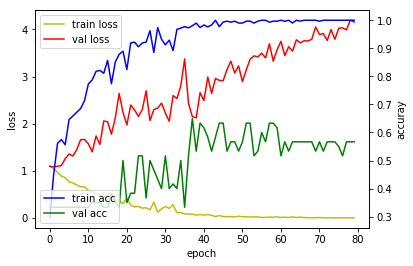

In [18]:
loss_and_acc_plot(hist)

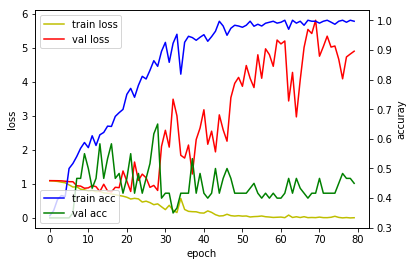

In [19]:
loss_and_acc_plot(hist2)

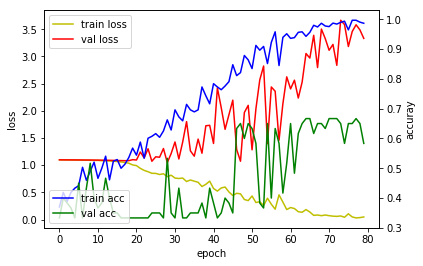

In [20]:
loss_and_acc_plot(hist3)

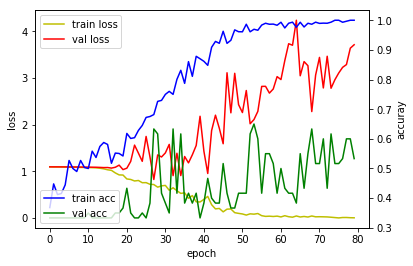

In [21]:
loss_and_acc_plot(hist4)

In [22]:
print("-- Evaluate --")
scores1 = model1.evaluate_generator(val_generator, steps=10)
print("model1 %s: %.2f%%" %(model1.metrics_names[1], scores1[1]*100))

print("-- Evaluate --")
scores2 = model2.evaluate_generator(val_generator, steps=10)
print("model2 %s: %.2f%%" %(model2.metrics_names[1], scores2[1]*100))

print("-- Evaluate --")
scores3 = model3.evaluate_generator(val_generator, steps=10)
print("model3 %s: %.2f%%" %(model3.metrics_names[1], scores3[1]*100))

print("-- Evaluate --")
scores4 = model4.evaluate_generator(val_generator, steps=10)
print("model1 %s: %.2f%%" %(model4.metrics_names[1], scores1[1]*100))

acc1 = scores1[1]
acc2 = scores2[1]
acc3 = scores3[1]
acc4 = scores4[1]

-- Evaluate --
model1 acc: 56.67%
-- Evaluate --
model2 acc: 45.00%
-- Evaluate --
model3 acc: 58.33%
-- Evaluate --
model1 acc: 56.67%


In [23]:
# ensemble(prob1,prob2,acc_list = [1,2] )
def model_ensemble(*prob, acc_list):
    prob_list = [p for p in prob]

    idx_acc_list = {idx: acc for idx, acc in enumerate(acc_list)}
    sorted_acc_list = [idx for idx, _ in sorted(idx_acc_list.items(),
                                                key=lambda value: (value[1], value[0]), reverse=True)]
    output = []
    for i in sorted_acc_list:
        temp = [x * (i + 1) for x in prob_list[i]]
        output.append(temp)
    final_prob = np.sum(output, axis=0)  # class갯수만큼 확률값 지금은 1*2

    final_score = np.mean(np.equal(np.argmax(final_prob, axis=1), val_generator.classes))
    print('Final val accuracy : %4f' % final_score)

    return final_prob

In [24]:
prob1 = model1.predict_generator(val_generator, steps=1)
prob2 = model2.predict_generator(val_generator, steps=1)
prob3 = model3.predict_generator(val_generator, steps=1)
prob4 = model4.predict_generator(val_generator, steps=1)

In [25]:
final_prob = model_ensemble(prob1,prob2,prob3,prob4, acc_list =[acc1,acc2,acc3,acc4] )
val_label = val_generator.class_indices
val_label_temp = list(val_label.keys())

pred = [val_label_temp[np.argmax(x)] for x in final_prob ]

Final val accuracy : 0.550000


In [26]:
pred2 = [val_label_temp[np.argmax(x)] for x in prob3 ]

In [27]:
label = val_generator.class_indices
label_temp = list(label.keys())

actual = []
for x in val_generator.index_array:
    temp = val_generator.classes[x]
    actual.append(label_temp[temp])

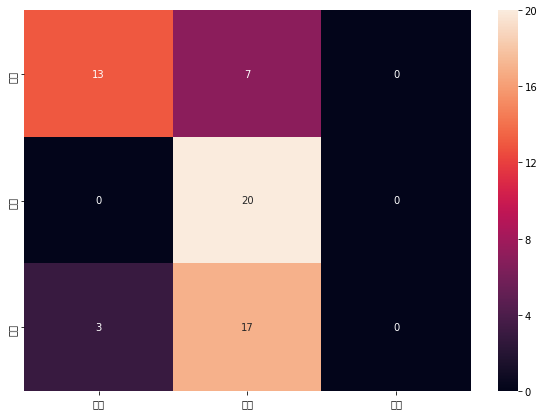

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

confusion_mtx = confusion_matrix(actual, pred) #pred2 

df_cm = pd.DataFrame(confusion_mtx, index = [i for i in label_temp],
                  columns = [i for i in label_temp])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [29]:
df_cm 

,계단,과제,구름
계단,13,7,0
과제,0,20,0
구름,3,17,0
